In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wc_matches=pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\UNIFIED PROJECTS\\WorldCupMatches.csv")
wc_players=pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\UNIFIED PROJECTS\\WorldCupPlayers.csv")
wc=pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\UNIFIED PROJECTS\\WorldCups.csv")

In [3]:
wc.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [4]:
wc_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [5]:
wc_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [6]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()


In [7]:
data_countries = pd.DataFrame(wc['Winner'].value_counts())
data_countries

,Winner
Brazil,5
Italy,4
Germany FR,3
Argentina,2
Uruguay,2
Spain,1
France,1
Germany,1
England,1


Brazil has won the tournament most number of times

In [8]:
data_countries.iplot(kind='bar',y='Winner',title='Countries who have won worldcups',colors='blue')

In [9]:
data_winner=pd.DataFrame(wc['Winner'].value_counts())
data_runner_up=pd.DataFrame(wc['Runners-Up'].value_counts())
data_third=pd.DataFrame(wc['Third'].value_counts())

In [10]:
data_winner.head()

,Winner
Brazil,5
Italy,4
Germany FR,3
Argentina,2
Uruguay,2


In [11]:
data_runner_up.head()

,Runners-Up
Germany FR,3
Argentina,3
Netherlands,3
Hungary,2
Czechoslovakia,2


In [12]:
data_third.head()

,Third
Germany,3
France,2
Brazil,2
Poland,2
Sweden,2


In [13]:
teams = pd.concat([data_winner, data_runner_up, data_third], axis = 1)
teams

,Winner,Runners-Up,Third
Brazil,5.0,2.0,2.0
Italy,4.0,2.0,1.0
Germany FR,3.0,3.0,1.0
Argentina,2.0,3.0,NaN
Uruguay,2.0,NaN,NaN
Spain,1.0,NaN,NaN
France,1.0,1.0,2.0
Germany,1.0,1.0,3.0
England,1.0,NaN,NaN
Netherlands,NaN,3.0,1.0


In [14]:
teams.fillna(0,inplace=True)
teams=teams.astype(int)

A complete depiction of number of world cups won, first runner-up, and second runner-up positions by various participating teams.

In [15]:
teams.iplot(kind='bar',yTitle='Count',title='Country wise  analysis',xTitle='Country')

In [16]:
data_home=wc_matches[['Home Team Name','Home Team Goals']].dropna()
data_away=wc_matches[['Away Team Name','Away Team Goals']].dropna()

In [17]:
data_home.head()

,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0


In [18]:
data_away.head()
half_team_home=pd.DataFrame(data1[['Home Team Name','Half-time Home Goals']])
half_team_away=pd.DataFrame(data1[['Away Team Name','Half-time Away Goals']])

,Away Team Name,Away Team Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0


In [19]:

data_home.columns= ['Countries','Goals']
data_away.columns= ['Countries','Goals']

In [20]:
data_country_goals = pd.concat([data_home, data_away], ignore_index=True)
data_country_goals

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
1699,Costa Rica,0.0
1700,Germany,7.0
1701,Argentina,0.0
1702,Netherlands,3.0


In [21]:
data_final_country_goal=data_country_goals.groupby('Countries').sum()

In [22]:
final_data=data_final_country_goal.sort_values(by='Goals',ascending=False)

In [23]:
final_data=final_data[:10]
final_data

,Goals
Countries,
Brazil,225.0
Argentina,133.0
Germany FR,131.0
Italy,128.0
France,108.0
Germany,104.0
Spain,92.0
Netherlands,91.0
Hungary,87.0


Brazil scored the most number of goals throughout the history of world cup followed by Argentina and Germany.


In [24]:
final_data.iplot(kind='bar',yTitle='No of Goals',title='Countries with maximum number of goals',colors='red',xTitle='Country')


In [25]:
half_team_home=pd.DataFrame(wc_matches[['Home Team Name','Half-time Home Goals']])
half_team_away=pd.DataFrame(wc_matches[['Away Team Name','Half-time Away Goals']])

In [26]:
half_team_home = half_team_home.groupby('Home Team Name').sum()
half_team_home = half_team_home.sort_values(by='Half-time Home Goals',ascending=False)
half_team_home

,Half-time Home Goals
Home Team Name,
Brazil,66.0
Argentina,48.0
Germany FR,38.0
Italy,36.0
Hungary,33.0
...,...
Norway,0.0
Iran,0.0
New Zealand,0.0


In [27]:
half_team_away = half_team_away.groupby('Away Team Name').sum()
half_team_away = half_team_away.sort_values(by='Half-time Away Goals',ascending=False)
half_team_away

,Half-time Away Goals
Away Team Name,
Spain,20.0
Germany,18.0
Netherlands,18.0
France,17.0
Brazil,17.0
...,...
China PR,0.0
Dutch East Indies,0.0
Slovenia,0.0


In [28]:
total = pd.concat([half_team_home, half_team_away], axis = 1)
total

,Half-time Home Goals,Half-time Away Goals
Brazil,66.0,17.0
Argentina,48.0,8.0
Germany FR,38.0,12.0
Italy,36.0,13.0
Hungary,33.0,7.0
...,...,...
Egypt,NaN,2.0
Israel,NaN,0.0
Kuwait,NaN,0.0
El Salvador,NaN,0.0


In [29]:
total['total_goals'] = total['Half-time Home Goals'] + total['Half-time Away Goals']
total = total.sort_values(by= 'total_goals',ascending=False)
total=total[:10]
total

,Half-time Home Goals,Half-time Away Goals,total_goals
Brazil,66.0,17.0,83.0
Argentina,48.0,8.0,56.0
Germany FR,38.0,12.0,50.0
Italy,36.0,13.0,49.0
Germany,28.0,18.0,46.0
France,25.0,17.0,42.0
Hungary,33.0,7.0,40.0
Netherlands,19.0,18.0,37.0
Spain,16.0,20.0,36.0
Uruguay,27.0,6.0,33.0


In [30]:
total.pop('total_goals')
total

,Half-time Home Goals,Half-time Away Goals
Brazil,66.0,17.0
Argentina,48.0,8.0
Germany FR,38.0,12.0
Italy,36.0,13.0
Germany,28.0,18.0
France,25.0,17.0
Hungary,33.0,7.0
Netherlands,19.0,18.0
Spain,16.0,20.0
Uruguay,27.0,6.0


Brazil has scored a majority of total goals playing as home team whereas spain scored more goals playing as away country rather than home country.


In [31]:
total.iplot(kind='bar',yTitle='Count',title='Country wise analysis',xTitle='Country')

In [35]:
def winner(wc_matches):
    if wc_matches['Home Team Goals'] > wc_matches['Away Team Goals']:
        return 'Home team won'
    elif wc_matches['Home Team Goals'] < wc_matches['Away Team Goals']:
        return 'Away Team won'
    

In [36]:
wc_matches['winner']=wc_matches.apply(lambda x:winner(x),axis=1)

In [37]:
wc_matches['winner'].value_counts()

Home team won    488
Away Team won    174
Name: winner, dtype: int64

In [38]:
labels=['Home team won','Away Team won']
sizes=[486,174]

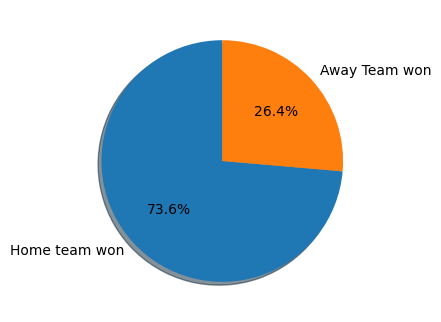

In [39]:
fig, ax = plt.subplots(figsize= (4, 4), dpi = 100)
explode = (0.1, 0, 0)
ax.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True,
      startangle = 90)

plt.show()

73.6 % of the matches were won by home team while 26.4 % were won by away team.

In [40]:
data_nat = pd.DataFrame(wc_players[['Team Initials','Player Name']])
data_nat.head()

,Team Initials,Player Name
0,FRA,Alex THEPOT
1,MEX,Oscar BONFIGLIO
2,FRA,Marcel LANGILLER
3,MEX,Juan CARRENO
4,FRA,Ernest LIBERATI


In [41]:
d2 = pd.DataFrame(data_nat['Team Initials'].value_counts())
d2

,Team Initials
BRA,2403
ITA,1843
ARG,1807
ENG,1378
FRG,1364
...,...
ZAI,66
ISR,66
KUW,66
CUB,45


In [42]:
d2.iplot(kind='bar',yTitle='No of players',title='Country codes vs number of players played',colors='blue',xTitle='Country code')



 Brazil has played the most number of players followed by Italy and Argentina

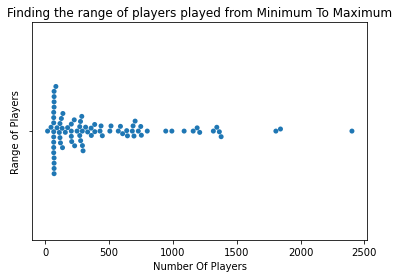

In [43]:
p2 = sns.swarmplot( x = 'Team Initials', data = d2)
plt.title('Finding the range of players played from Minimum To Maximum')
plt.xlabel('Number Of Players')
plt.ylabel('Range of Players')
plt.show()

Most of the teams have played between 0  and 500 players only in the complete competition, and handful of countries have played more than 1500 players in the history of competition.
